<a href="https://colab.research.google.com/github/EmmanuelLwele/Parametric-Representation-of-3D-Propeller-Blade-Geometry/blob/main/Question7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESGI 2025 AALBORG

## PROBLEM 2 Parametric Representation of 3D Propeller Blade Geometry

### QUESTION #1

#### Description of the camber as a reversible transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from tqdm import tqdm


from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

##### Going forwards

In [ ]:
#blade parameters

mm = 0.02             # max blade half-width
pp = 0.5              # x-coordinate of point in the camber line giving the max blade half-width
rr = 0.04              # leading edge radius
tt = np.sqrt(rr)/1.1

In [ ]:
# y-coordinate of points in the camber line as a function of the x-coordinate

def yycc(x,m,p):

    out = m *(2*p*x -x**2)/p**2
    if (x > p):
        out = m*(1 -2*p +2*p*x-x**2)/(1-p)**2
    return out


# derivative of the funtion giving the y-coord

def dyycc(x,m,p):
    # Use np.where for vectorized conditional logic
    out = np.where(x <= p, m * (2*p - 2*x) / p**2, m * (2*p - 2*x) / (1-p)**2)
    return out


# half-width as a function of the x-coord of the corresponding point in the camber line

def width(x,t):
  out = t *(0.2969*np.sqrt(x)-0.1260 *x -0.3516 * x**2 + 0.2843 * x**3 -0.10150 * x**4)/0.20
  return out


# angle between tangent to camber line and horizontal axis

def varphi(x,m,p):
  out = np.arctan2(dyycc(x,m,p),1)
  return out


# points in the upper curve (suction side)

def xxuu(x,m,p,t):
  out = x - width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyuu(x,m,p,t):
  out = yycc(x,m,p) + width(x,t) * np.cos(varphi(x,m,p))
  return out


# points in the lower curve (pressure side)

def xxll(x,m,p,t):
  out = x + width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyll(x,m,p,t):
  out = yycc(x,m,p) - width(x,t) * np.cos(varphi(x,m,p))
  return out


In [ ]:
npts = 1000
xx = np.linspace(0,1,npts)
YC = np.array([yycc(u,mm,pp) for u in xx])

In [ ]:
%%skip

plt.axis('equal')
plt.title(f'Camber line for m={mm}, p={pp} and r={rr}')
plt.plot(xx,YC)
#plt.axis('off')
plt.show()

In [ ]:
%%skip

half_width = np.array([width(u,tt) for u in xx])

plt.axis('equal')
plt.title(f'Half-width function for m={mm}, p={pp} and r={rr}')
plt.plot(xx,half_width)

In [ ]:
%%skip

angles = np.array([varphi(u,mm,pp) for u in xx])

plt.axis('equal')
plt.title(f'Varphi for m={mm}, p={pp} and r={rr}')
plt.plot(xx,angles)

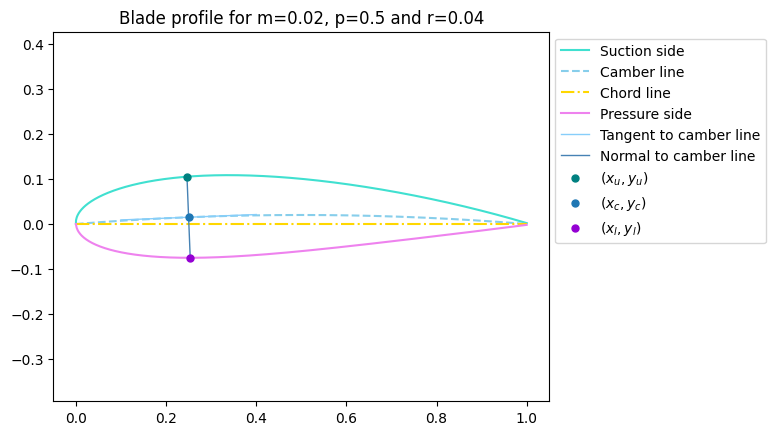

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

x_c = 0.25

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU,YU, color='turquoise',label='Suction side')
plt.plot(xx,YC, color='skyblue',linestyle='dashed',label='Camber line')
plt.plot([0,1],[0,0], color='gold',linestyle='dashdot',label='Chord line')
plt.plot(XL,YL, color='violet',label='Pressure side')

# tangent
plt.plot([x_c-0.15, x_c+0.15], [dyycc(x_c, mm, pp)*(-0.15)+yycc(x_c, mm, pp), dyycc(x_c, mm, pp)*(0.15)+yycc(x_c, mm, pp)],
         color='lightskyblue', linewidth=1, label='Tangent to camber line')

# normal
plt.plot([xxuu(x_c,mm,pp,tt), xxll(x_c,mm,pp,tt)], [yyuu(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt)],
         color='steelblue', linewidth=1, label='Normal to camber line')

# points
plt.plot(xxuu(x_c,mm,pp,tt), yyuu(x_c,mm,pp,tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')  # plot in upper curve
plt.plot(x_c, yycc(x_c,mm,pp), 'o', markersize=5, label='$(x_c,y_c)$')  # plot in camber line
plt.plot(xxll(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$')  # plot in lower curve
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

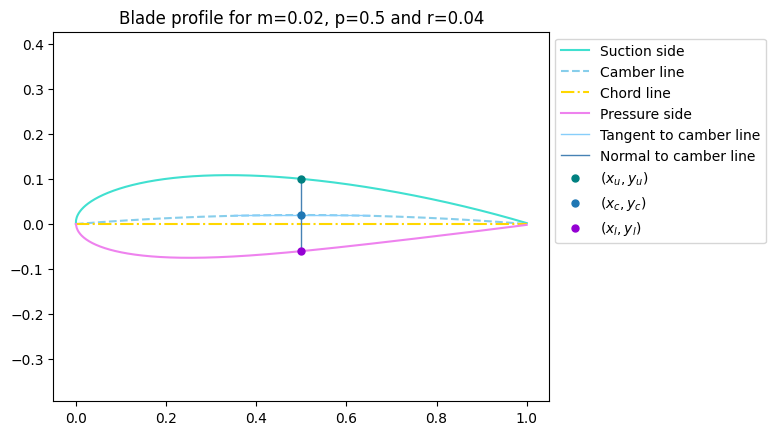

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

x_c = 0.5

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU,YU, color='turquoise',label='Suction side')
plt.plot(xx,YC, color='skyblue',linestyle='dashed',label='Camber line')
plt.plot([0,1],[0,0], color='gold',linestyle='dashdot',label='Chord line')
plt.plot(XL,YL, color='violet',label='Pressure side')

# tangent
plt.plot([x_c-0.15, x_c+0.15], [dyycc(x_c, mm, pp)*(-0.15)+yycc(x_c, mm, pp), dyycc(x_c, mm, pp)*(0.15)+yycc(x_c, mm, pp)],
         color='lightskyblue', linewidth=1, label='Tangent to camber line')

# normal
plt.plot([xxuu(x_c,mm,pp,tt), xxll(x_c,mm,pp,tt)], [yyuu(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt)],
         color='steelblue', linewidth=1, label='Normal to camber line')

# points
plt.plot(xxuu(x_c,mm,pp,tt), yyuu(x_c,mm,pp,tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')  # plot in upper curve
plt.plot(x_c, yycc(x_c,mm,pp), 'o', markersize=5, label='$(x_c,y_c)$')  # plot in camber line
plt.plot(xxll(x_c,mm,pp,tt), yyll(x_c,mm,pp,tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$')  # plot in lower curve
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
%%skip

# center of the leading-edge circle

x_circle = rr * np.cos(np.arctan(2*mm/pp))
y_circle = rr * np.sin(np.arctan(2*mm/pp))

print(x_circle)
print(y_circle)

In [ ]:
%%skip

plt.rcParams["figure.figsize"] = (9,9)

fig, ax = plt.subplots()

ax.set_aspect('equal')  # same as plt.axis('equal')

# Now use ax instead of plt for plotting
ax.plot(XU, YU, color='turquoise', label='Suction side')
ax.plot(xx, YC, color='skyblue', linestyle='dashed', label='Camber line')
ax.plot([0, 1], [0, 0], color='gold', linestyle='dashdot', label='Chord line')
ax.plot(XL, YL, color='violet', label='Pressure side')

# Tangent
ax.plot([x_c - 0.15, x_c + 0.15],
        [dyycc(x_c, mm, pp) * (-0.15) + yycc(x_c, mm, pp),
         dyycc(x_c, mm, pp) * (0.15) + yycc(x_c, mm, pp)],
        color='lightskyblue', linewidth=1, label='Tangent to camber line')

# Normal
ax.plot([xxuu(x_c, mm, pp, tt), xxll(x_c, mm, pp, tt)],
        [yyuu(x_c, mm, pp, tt), yyll(x_c, mm, pp, tt)],
        color='steelblue', linewidth=1, label='Normal to camber line')

# Points
ax.plot(xxuu(x_c, mm, pp, tt), yyuu(x_c, mm, pp, tt), 'o', markersize=5, color='teal', label='$(x_u,y_u)$')
ax.plot(x_c, yycc(x_c, mm, pp), 's', markersize=5, label='$(x_c,y_c)$')
ax.plot(xxll(x_c, mm, pp, tt), yyll(x_c, mm, pp, tt), 'D', markersize=4, color='darkviolet', label='$(x_l,y_l)$')

# Create and add the circle
circle = plt.Circle((x_circle, y_circle), rr, color='darkslateblue', fill=False, label='Leading circle')
ax.add_patch(circle)

ax.legend(bbox_to_anchor=(1.45, 1.05))
plt.show()


##### Going backwards

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
# the function to compute alpha and beta for given x-coordinate

def find_alpha_and_beta(x, m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find: alpha such that xxuu(alpha, m, p, t) = x
    and beta such that xxll(beta, m, p, t) = x.
    """
    targets = [x]
    solutionsu = []
    solutionsl = []

    for value in targets:
        # functions whose root we want:
        # f(x) = xxuu(x) - value = 0
        fu = lambda x: xxuu(x, m, p, t) - value
        # g(x) = xxcc(x) - value = 0
        fl = lambda x: xxll(x, m, p, t) - value

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
common_x = 0.2

alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)

print(alpha)
print(beta)
print(y_c)

[0.20412731]
[0.1957922]
[0.2]


In [ ]:
# check outputs

print(xxuu(alpha,mm,pp,tt))
print(yyuu(alpha,mm,pp,tt))
print(xxll(beta,mm,pp,tt))
print(yyll(beta,mm,pp,tt))

[0.19999995]
[0.1001829]
[0.20000011]
[-0.07385556]


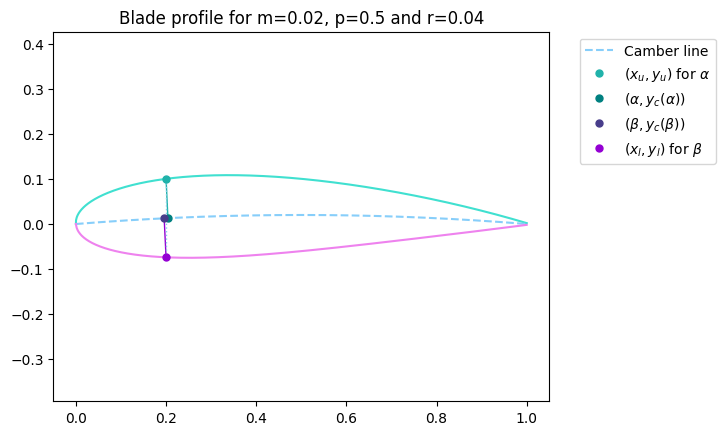

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

common_x = 0.2
alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)
alpha_for_x = alpha[0]
beta_for_x = beta[0]

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')
# curves
plt.plot(XU,YU, color='turquoise')
plt.plot(xx,YC, color='lightskyblue', linestyle='dashed',label='Camber line')
plt.plot(XL,YL, color='violet')
# line segments
plt.plot([common_x, alpha_for_x], [yyuu(alpha_for_x,mm,pp,tt), yycc(alpha_for_x,mm,pp)],
         color='lightseagreen', linewidth=1)
plt.plot([common_x, beta_for_x], [yyll(beta_for_x,mm,pp,tt), yycc(beta_for_x,mm,pp)],
         color='darkviolet', linewidth=1)
plt.plot([common_x, common_x], [yyuu(alpha_for_x,mm,pp,tt), yyll(beta_for_x,mm,pp,tt)],
         color='skyblue', linestyle='dotted', linewidth=1)
# points
plt.plot(common_x, yyuu(alpha_for_x,mm,pp,tt), 'o', markersize=5, color='lightseagreen', label='$(x_u,y_u)$ for $\\alpha$')  # point in upper curve
plt.plot(alpha_for_x, yycc(alpha_for_x,mm,pp), 'o', markersize=5, color='teal', label='$(\\alpha,y_c(\\alpha))$')  # alpha-point in camber line
plt.plot(beta_for_x, yycc(beta_for_x,mm,pp), 'o', markersize=5, color='darkslateblue', label='$(\\beta,y_c(\\beta))$')  # beta-point in camber line
plt.plot(common_x, yyll(beta_for_x,mm,pp, tt), 'o', markersize=5, color='darkviolet', label='$(x_l,y_l)$ for $\\beta$')  # point in lower curve

plt.legend(bbox_to_anchor=(1.35, 1))
plt.show()

### QUESTION #7

In [ ]:
# the function to compute alpha and beta for targets

def find_x_for_targets(m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find x_i such that xxuu(x_i, m, p, t) = target_i
    for target_i in {0.1, 0.2, ..., 0.9}.
    """
    targets = np.arange(0.1, 1.0, 0.1)
    solutionsu = []
    solutionsl = []

    for y in targets:
        # function whose root we want: f(x) = xxuu(x) - y = 0
        fu = lambda x: xxuu(x, m, p, t) - y
        fl = lambda x: xxll(x, m, p, t) - y

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
# choose sample points (vertically aligned)

xcima, xbaixo , yl = find_x_for_targets(mm, pp, tt)
print("xxuu:",np.array([xxuu(u,mm,pp,tt) for u in xcima]))
print("yyuu:",np.array([yyuu(u,mm,pp,tt) for u in xcima]))
print("xxll:",np.array([xxll(u,mm,pp,tt) for u in xcima]))
print("yyll:",np.array([yyll(u,mm,pp,tt) for u in xbaixo]))

xxuu: [0.10000023 0.19999995 0.30000025 0.39999942 0.5        0.60000078
 0.6999998  0.79999961 0.90000023]
yyuu: [0.07943406 0.1001829  0.107778   0.10705686 0.1002125  0.08848691
 0.07260237 0.05291008 0.02944667]
xxll: [0.10910431 0.20825467 0.30573363 0.4027712  0.5        0.59780844
 0.6964636  0.79618226 0.89717422]
yyll: [-0.06271617 -0.07385556 -0.07417982 -0.06881595 -0.0602125  -0.04981169
 -0.0384791  -0.02667034 -0.01451733]


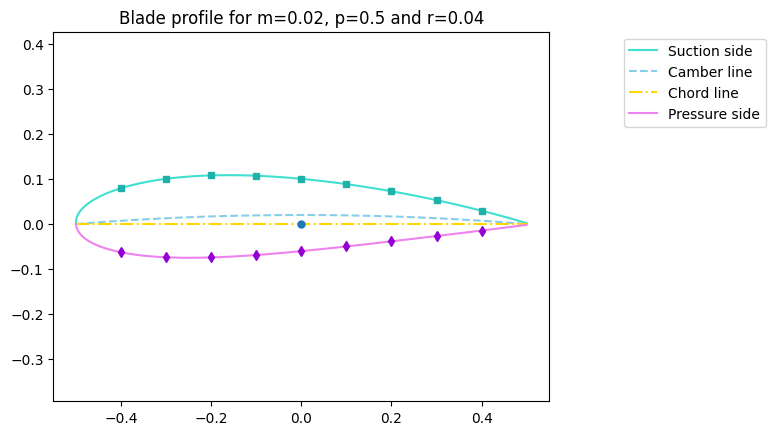

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

d = 0.5       # horizontal displacement to move origin to (0.5,0)
x_c = 0.5

plt.axis('equal')
plt.title(f'Blade profile for m={mm}, p={pp} and r={rr}')

# lines
plt.plot(XU-d,YU, color='turquoise', label='Suction side')
plt.plot(xx-d,YC, color='skyblue', linestyle='dashed', label='Camber line')
plt.plot([0-d,1-d],[0,0], color='gold', linestyle='dashdot', label='Chord line')
plt.plot(XL-d,YL, color='violet', label='Pressure side')

# points
plt.plot(0, 0, 'o', markersize=5)
for u in xcima:
  plt.plot(xxuu(u,mm,pp,tt)-d, yyuu(u,mm,pp,tt), 's', markersize=5, color='lightseagreen')
for u in xbaixo:
  plt.plot(xxll(u,mm,pp,tt)-d, yyll(u,mm,pp,tt), 'd', markersize=5, color='darkviolet')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
# compute rho and theta for each point in sample

import math

# Convert to polar coordinates (r, theta)
def get_polar(points):
  polar_points = []
  for x, y in points:
    r = math.hypot(x, y)               # sqrt(x^2 + y^2)
    theta = math.atan2(y, x) % (2 * math.pi)  # ensure 0 ≤ θ < 2π
    polar_points.append((r, theta))
  return polar_points


In [ ]:
sample_u = [(xxuu(u,mm,pp,tt)-d, yyuu(u,mm,pp,tt)) for u in xcima]
sample_l = [(xxll(u,mm,pp,tt)-d, yyll(u,mm,pp,tt)) for u in xbaixo]

sample_u_polar = get_polar(sample_u)
sample_l_polar = get_polar(sample_l)

print(sample_u_polar)
print(sample_l_polar)

[(0.4078107232478737, 2.9455577775646224), (0.3162856972812593, 2.8192935511138573), (0.22719154711121547, 2.6473186787198806), (0.14649671561400504, 2.3221288283621395), (0.10021250303116908, 1.5707963267948966), (0.13352935894096388, 0.7243884478583034), (0.21276988229123553, 0.34821962426302394), (0.304629681317707, 0.17457189397208214), (0.40108264685697126, 0.07348407947084373)]
[(0.40488626259408317, 3.2971171053613944), (0.3089572463755596, 3.382977788291697), (0.21331279896815494, 3.4967643634320424), (0.12139045776692606, 3.7443275211992773), (0.06021250303116907, 4.71238898038469), (0.11172011738445978, 5.821048944427387), (0.20366828927078082, 6.093112666704109), (0.3011828341016879, 6.194517165404161), (0.4002634598765626, 6.2469079170110104)]


In [ ]:
s

/tmp/ipython-input-237344038.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.45, 1))


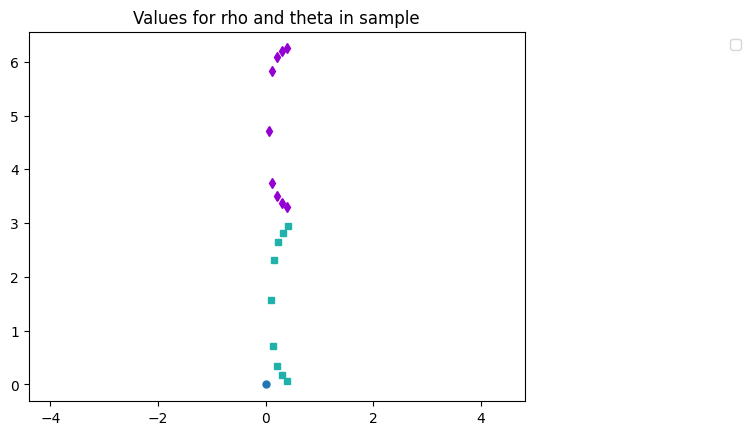

In [ ]:
plt.axis('equal')
plt.title(f'Values for rho and theta in sample')

# points
plt.plot(0, 0, 'o', markersize=5)
for pair in sample_u_polar:
  plt.plot(pair[0], pair[1], 's', markersize=5, color='lightseagreen')
for pair in sample_l_polar:
  plt.plot(pair[0], pair[1], 'd', markersize=5, color='darkviolet')

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

In [ ]:
R = 0.6

P0 = []
for k in range(len(sample_l_polar)):
  P0.append(R * np.cos(sample_l_polar[1]), R * np.sin(sample_l_polar[1]), 0)

P3 = []
for k in range(len(sample_l_polar)):
  P0.append(R * np.cos(sample_l_polar[1]), R * np.sin(sample_l_polar[1]), 0)

In [ ]:
%%skip

# ---------------------------------------------------------------------
# the function to compute alpha and beta for targets
# ---------------------------------------------------------------------

def find_x_for_targets(m, p, t, tol=1e-6):
    """
    Find x_i such that xxuu(x_i, m, p, t) = target_i
    and xxll(x_i, m, p, t) = target_i
    for target_i in {0.1, 0.2, ..., 0.9}.
    """
    targets = np.arange(0.1, 1.0, 0.1)
    solutionsu, solutionsl = [], []

    for y in targets:
        fu = lambda x: xxuu(x, m, p, t) - y
        fl = lambda x: xxll(x, m, p, t) - y

        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            solutionsu.append(sol.root if sol.converged else np.nan)
        except ValueError:
            solutionsu.append(np.nan)

        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            solutionsl.append(sol.root if sol.converged else np.nan)
        except ValueError:
            solutionsl.append(np.nan)

        fyu = lambda x: yyuu(x, m, p, t)
        fyl = lambda x: yyll(x, m, p, t)

        output_u = np.array([fyu(u) for u in solutionsu])
        output_l = np.array([fyl(u) for u in solutionsl])


    return output_u, output_l, targets

# ---------------------------------------------------------------------
# Mesh generation
# ---------------------------------------------------------------------
def closed_grid(start: float, stop: float, step: float) -> np.ndarray:
    n = int(round((stop - start) / step)) + 1
    return np.round(np.linspace(start, stop, n, endpoint=True), 6)

def build_mesh() -> np.ndarray:
    radius = closed_grid(0.01, 0.20, 0.01)   # 20
    mthick = closed_grid(0.10, 0.40, 0.01)   # 31
    pp     = closed_grid(0.20, 0.50, 0.01)   # 31
    MM, PP, TT = np.meshgrid(mthick, pp, radius, indexing="ij")
    X = np.stack([MM.ravel(), PP.ravel(), TT.ravel()], axis=1)  # (19220, 3)
    return X

# ---------------------------------------------------------------------
# Run for all mesh points
# ---------------------------------------------------------------------
def run_over_mesh():
    mesh = build_mesh()
    n_points = mesh.shape[0]
    n_targets = 9

    # results arrays
    upper = np.full((n_points, n_targets), np.nan)
    lower = np.full((n_points, n_targets), np.nan)

    for i, (m, p, t) in enumerate(tqdm(mesh, desc="Solving")):
        su, sl, _ = find_x_for_targets(m, p, t)
        upper[i, :] = su
        lower[i, :] = sl

    return mesh, upper, lower

In [ ]:
%%skip

mesh, xu, xl = run_over_mesh()
print("mesh shape:", mesh.shape)
print("upper solutions shape:", xu.shape)
print("lower solutions shape:", xl.shape)
print("sample row:")
print("m, p, t =", mesh[0])
print("x_upper =", xu[0])
print("x_lower =", xl[0])